# Dimension Reduction

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Introduction
- 차원 축소 개요
    - 차원 축소는 매우 많은 피처로 구성된 다차원 데이터 세트의 차원을 축소해 새로운 차원의 데이터 세트를 생성하는 것
    - 차원이 증가할 수록 데이터 포인트 간의 거리가 기하급수적으로 멀어지게 되고 희소(sparse)한 구조를 가지게 됨
    - 피처가 많을 경우 개별 피처간 상관관계가 높을 가능성이 큼
        - 다중공선성 문제로 모델 예측 성능이 저하됨
    - 차원 축소는 피처 선택(feature_selection)과 피처 추출(feature_extraction)로 나눌 수 있음
        - feature_selection : 특정 피처에 종속성이 강한 불필요한 피처는 아예 제거하고 데이터의 특징을 잘 나타내는 주요 피처만 선택
        - feature_extraction : 기존 피처를 저차원의 중요 피처로 압축해서 추출, 중요 특성은 기존의 피처가 압축된 것이므로 기존의 피처와는 완전히 다른 값이 됨
            - 단순 압축이 아닌 피처를 함축적으로 더 잘 설명할 수 있는 또 다른 공간으로 매핑해 추출하는 것
    - 차원 축소는 단순한 데이터 압축이 아닌 데이터를 잘 설명할 수 있는 잠재적인 요소를 추출하는데 있음
    - 차원축소는 이미지 데이터나 텍스트 데이터에서 원본 데이터보다 더 높은 설명력을 가지게 할 수 있음
    - 차원 축소의 대표적 알고리즘 : PCA, LDA, SVD, NMF


## PCA(Pricipal Component Analysis; 주성분 분석)
- PCA는 여러 변수 간 존재하는 상관관계를 이용해 이를 대표하는 주성분을 추출해 차원을 축소하는 기법
- 기존 데이터의 정보 유실이 최소화되는 것은 당연함
- PCA는 **가장 높은 분산을 가지는 데이터의 축** 을 찾아 이 축으로 차원을 축소하는데, 이것이 PCA의 주성분이 됨

<img src="https://blog.kakaocdn.net/dn/bUvtbN/btrowkIz2oH/pFi7dcwZI0DolbyEpKTHPk/img.png" width=1000 height=500 alt=20></img>

- 가장 큰 데이터 변동성(Variance)을 기반으로 첫번째 벡터 축을 생성하고, 두번째 벡터축은 이 벡터축에 직각이 되는 벡터를 축으로 함
    - 세번째 축은 다시 두 번째 축과 직각이 되는 벡터를 설정하는 방식으로 축을 생성함
    - 이렇게 생성된 벡터 축에 원본 데이터를 투영하면 벡터 축의 개수만큼의 차원으로 원본 데이터가 차원 축소 됨
- 주성분 분석은 원본 데이터 피처개수에 비해 매우 작은 주성분으로 원본 데이터의 총 변동성을 대부분 설명할 수 있는 분석법
    - 선형대수 관점에서 해석하면
        - 입력 데이터의 공분산 행렬(Covariance Matrix)을 고유값 분해하고, 이렇게 구한 고유벡터에 입력데이터를 선형 변환하는 것
        - 고유벡터가 PCA의 주성분 벡터로서 입력 데이터의 분산이 큰 방향을 나타냄
        - 고윳값(eigenvalue)은 고유벡터의 크기를 나타내면서 동시에 입력 데이터의 분산을 나타냄
- 보통 분산은 한 개의 특정한 변수의 데이터 변동을 의미하나, 공분산은 두 변수간의 변동을 의미함
- 사람 키를 X, 몸무게를 Y라고 하면 공분산 $Cov(X,Y) > 0 =$ X(키)가 증가할 때 Y(몸무게)도 증가한다는 의미

- 공분산행렬 : 여러 변수와 관련된 공분산을 포함하는 정방형 행렬
||X|Y|Z|
|---|---|---|---|
|X|3.0|-0.71|-0.24|
|Y|-0.71|4.5|0.28|
|Z|-0.24|0.28|0.91|
- 공분산 행렬에서 대각선 원소는 각 변수(X,Y,Z)의 분산을 의미하며, 대각선 이외의 원소는 가능한 모든 변수 쌍 간의 공분산을 의미함
- 공분산 행렬은 정방행렬이며 대칭행렬임
    - 정방행렬 중 대각 원소를 중심으로 원소 값이 대칭되는 행렬, 즉 $A^T = A$인 행렬을 대칭행렬으로 부름
    - 공분산 행렬을 개별 분산값을 대각원소로 하는 대칭행렬임
    - 대칭행렬은 항상 고유벡터를 직교행렬로, 고유값을 정방행렬로 대각화할 수 있음
    - 입력데이터의 공분산 행렬을 $C$라고 하면, 공분산 행렬의 특성으로 인해 다음과 같이 분해할 수 있음
$$C=P\sum P^T$$
- 이 때, $P$는 nxn의 직교행렬이며, $\sum$은 nxn의 정방행렬, $P^T$는 행렬P의 전치행렬임
- 고유벡터는 행렬 A를 곱하더라도 방향이 변하진 않고 그 크기만 변하는 벡터를 지칭함
    - 즉, Ax = ax(A는 행렬, x는 고유벡터, a는 스칼라값)
- 고유벡터는 여러개가 존재하며, 정방 행렬은 최대 그 차원수만큼의 고유벡터를 가질 수 있음
    - 예를 들어 2x2 행렬은 두 개의 고유 벡터를, 3x3 행렬은 3개의 고유벡터를 가질 수 있음
    - 고유벡터는 행렬이 작용하는 힘의 방향과 관계가 있어서 행렬을 분해하는데 사용됨

**입력 데이터의 공분산 행렬이 고유벡터와 고유값으로 분해될 수 있으며, 이렇게 고유벡터를 이용해 입력 데이터를 선형 변환하는 방식이 PCA라는 것**

PCA는 많은 속성으로 구분된 원본 데이터를 그 핵심을 구성하는 데이터로 압축한 것
- 붓꽃(iris) 데이터를 활용해서 4개의 속성으로 되어있는 데이터를 2개의 PCA 차원으로 압축해 원본데이터와 압축된 데이터 세트를 비교

In [38]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
columns = [x.replace(' (cm)','').strip().replace(' ','_') for x in iris['feature_names']]
irisdf = pd.DataFrame(iris.data,columns=columns)
irisdf['target'] = iris.target
irisdf.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


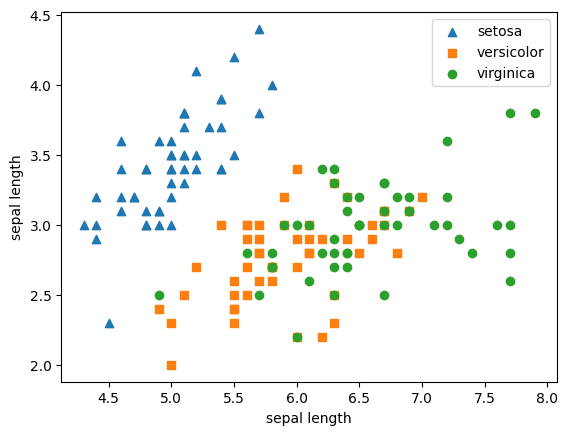

In [40]:
# setosa는 세모, veriscolor는 네모, virginica는 동그라미로 표현
markers = ['^','s','o']

#setosa의 target 값은  0, veriscolor는 1, virginica는 2, 각 target별로 다른 모양으로 산점도로 표시
for i, marker in enumerate(markers):
    x_axis_data = irisdf[irisdf['target'] == i]['sepal_length']
    y_axis_data = irisdf[irisdf['target'] == i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data,marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal length')
plt.show()

- setosa 품종은 확연하게 구분되지만 나머지 2개는 구분하기 어려운 부분이 있음
- PCA로 4개 속성을 2개로 압축한 뒤 앞의 예제와 비슷하게 2개의 PCA 속성으로 붓꽃 데이터의 품종 분포를 2차원 데이터로 시각화
- 붓꽃 데이터에 바로 PCA를 적용하기 전 개별 속성을 함께 스케일링 해야함
- **PCA는 여러 속성의 값을 연산해야 하므로 속성의 스케일에 영향을 받음** 
- PCA로 압축하기 전 각 속성값을 스케일로 변환하는 것이 필요함

In [42]:
from sklearn.preprocessing import StandardScaler

print(f'raw df shape : {irisdf.shape}')
#Target값 제외한 모든 속성 값을 StandardScaler를 이용해 표준 정규 분포를 가지는 값들로 변환
iris_scaled = StandardScaler().fit_transform(irisdf.iloc[:,:-1]) 

from sklearn.decomposition import PCA

pca = PCA(n_components=2) # n_components = 반환 차원 수
# fit()과 transform()을 호출해 PCA변환 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(f'pca df shape : {iris_pca.shape}')

#PCA 변환된 데이터의 컬럼명을 각각 pca_component_1, pca_component_2로 명명
pca_columns = ['pca_component_1', 'pca_component_2']
irisdf_pca = pd.DataFrame(iris_pca, columns=pca_columns)
irisdf_pca['target'] = iris.target
irisdf_pca.head(3)

raw df shape : (150, 5)
pca df shape : (150, 2)


,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


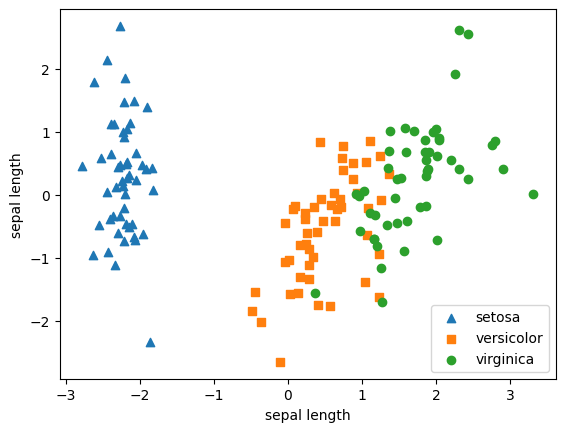

In [45]:
# setosa는 세모, veriscolor는 네모, virginica는 동그라미로 표현
markers = ['^','s','o']

# pca_component_1을 x축, pc_component_2를 y축으로 하는 scatter plot 수행
for i, marker in enumerate(markers):
    x_axis_data = irisdf_pca[irisdf_pca['target'] == i]['pca_component_1']
    y_axis_data = irisdf_pca[irisdf_pca['target'] == i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data,marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal length')
plt.show()